# SchedTune Trace Analysis on JUNO

This notebook shows how to analyze the trace files for schedtune.

In [1]:
import logging
reload(logging)
logging.basicConfig(
    format='%(asctime)-9s %(levelname)-8s: %(message)s',
    datefmt='%I:%M:%S')

# Enable logging at INFO level
logging.getLogger().setLevel(logging.INFO)

In [2]:
# Generate plots inline
%matplotlib inline

import json
import os

# Support for trace events analysis
from trace import Trace

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

# Test setup

In [10]:
# Base folder where tests folder are located
res_dir = '../../results/nosetests_schedstune'
logging.info('Content of the output folder %s', res_dir)
!tree {res_dir}

05:54:45  INFO    : Content of the output folder ../../results/nosetests_schedstune


../../results/nosetests_schedstune
|-- rtapp:boost0:mixprof
|   |-- 1
|   |   |-- mixprof_00.json
|   |   |-- output.log
|   |   |-- rt-app-task_r5_10-60-0.log
|   |   |-- trace.dat
|   |   `-- trace.txt
|   |-- kernel.config
|   |-- kernel.version
|   `-- platform.json
|-- rtapp:boost15:mixprof
|   |-- 1
|   |   |-- mixprof_00.json
|   |   |-- output.log
|   |   |-- rt-app-task_r5_10-60-0.log
|   |   |-- trace.dat
|   |   `-- trace.txt
|   |-- kernel.config
|   |-- kernel.version
|   `-- platform.json
|-- rtapp:boost30:mixprof
|   |-- 1
|   |   |-- mixprof_00.json
|   |   |-- output.log
|   |   |-- rt-app-task_r5_10-60-0.log
|   |   |-- trace.dat
|   |   `-- trace.txt
|   |-- kernel.config
|   |-- kernel.version
|   `-- platform.json
`-- rtapp:boost60:mixprof
    |-- 1
    |   |-- mixprof_00.json
    |   |-- output.log
    |   |-- rt-app-task_r5_10-60-0.log
    |   |-- trace.dat
    |   `-- trace.txt
    |-- kernel.config
    |-- kernel.version
    `-- platform.json

8 directories, 32

# Configuration

In [19]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    logging.info("trace_file={}".format(trace_file))
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
            "cpu_frequency",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "sched_switch",
            "dequeue_task_fair",
            "enqueue_task_fair", 
            "set_next_entity",
            "cpu_capacity",
            "sched_blocked_reason",
            "sched_boost_cpu",
            "sched_boost_task",
            "sched_contrib_scale_f",
            "sched_cpu_hotplug",
            "sched_energy_diff",
            "sched_kthread_stop",
            "sched_kthread_stop_ret",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "sched_migrate_task",
            "sched_move_numa",
            "sched_pi_setprio",
            "sched_process_exec",
            "sched_process_exit",
            "sched_process_fork",
            "sched_process_free",
            "sched_process_wait",
            "sched_stat_blocked",
            "sched_stat_iowait",
            "sched_stat_runtime",
            "sched_stat_sleep",
            "sched_stat_wait",
            "sched_stick_numa",
            "sched_swap_numa",
            "sched_switch",
            "sched_tune_boostgroup_update",
            "sched_tune_config",
            "sched_tune_tasks_update",
            "sched_tune_filter",
            "sched_wait_task",
            "sched_wake_idle_without_ipi",
            "sched_wakeup",
            "sched_wakeup_new",
    ]
    trace = Trace(platform, run_dir, events)
    
    # Define time ranges for all the temporal plots
    trace.setXTimeRange(t_min, t_max)
    
    # Tasks plots
#     trace.analysis.tasks.plotTasks()
    # Tasks plots
    trace.analysis.tasks.plotTasks(pa.tasks())
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster plots
    trace.analysis.frequency.plotClusterFrequencies()


# Results

## No Boosting

06:18:48  INFO    : trace_file=../../results/nosetests_schedstune/rtapp:boost0:mixprof/1/trace.dat
06:18:48  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.tracing_mark_write.TracingMarkWrite object at 0x7f2beb673bd0> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.idle.CpuIdle object at 0x7f2beb18ee90> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.sched_boost_task object at 0x7f2beb1796d0> from cache, reading it from trace
  warnings.warn(warnstr)
06:18:48  INFO    : Platform clusters verified to be Frequency coherent
06:18:49  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.85, std: 0.21
06:18:50  WARNING : Event [sched_overutilized] not fou

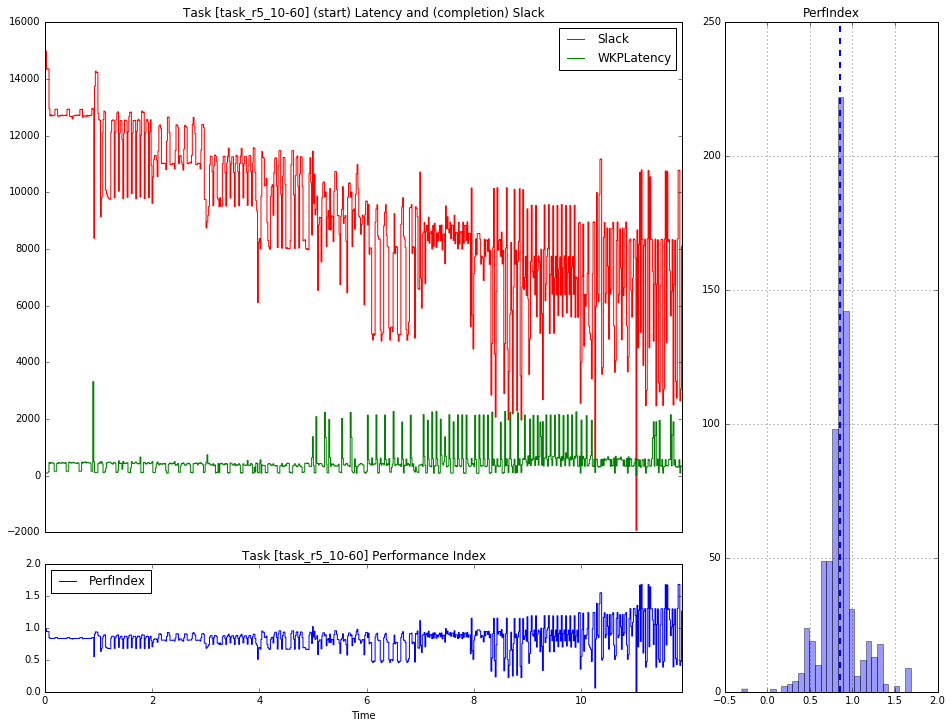

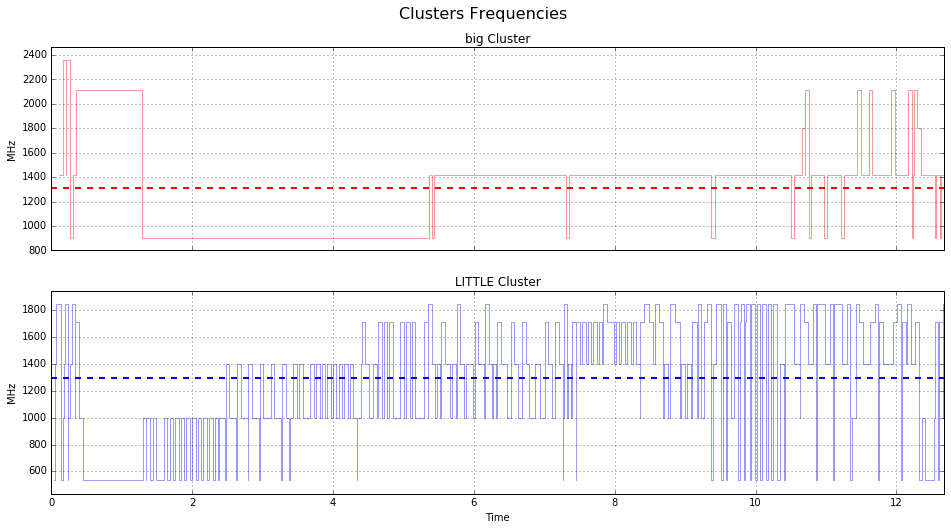

In [20]:
analysis('noboost')

## Boost 15%

06:19:14  INFO    : trace_file=../../results/nosetests_schedstune/rtapp:boost15:mixprof/1/trace.dat
06:19:14  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.sched.SchedLoadAvgTask object at 0x7f2bea0b7490> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.SchedWakeup object at 0x7f2bea5a2b50> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.sched.SchedCpuCapacity object at 0x7f2beb0ece90> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.set_next_entity object at 0x7f2bead532d0> from cache, reading it from trace
  warnings.warn(warnst

06:19:18  INFO    : Platform clusters verified to be Frequency coherent
06:19:19  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.02, std: 0.15
06:19:20  WARNING : Event [sched_overutilized] not found, plot DISABLED!
06:19:20  WARNING : Event [sched_overutilized] not found, plot DISABLED!
06:19:20  INFO    : LITTLE cluster average frequency: 0.596 GHz
06:19:20  INFO    : big    cluster average frequency: 1.121 GHz


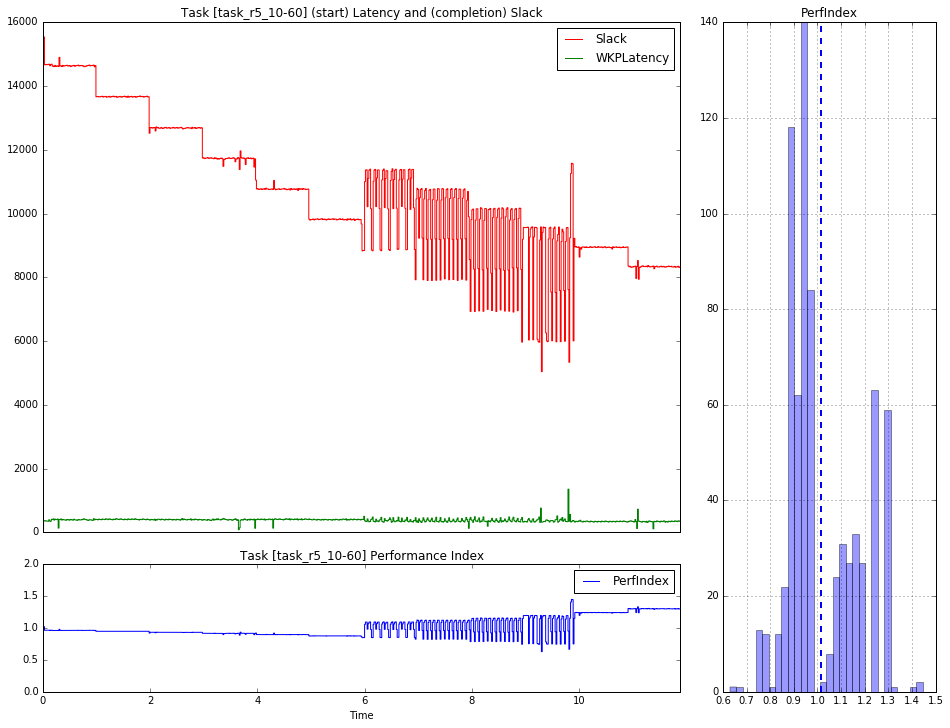

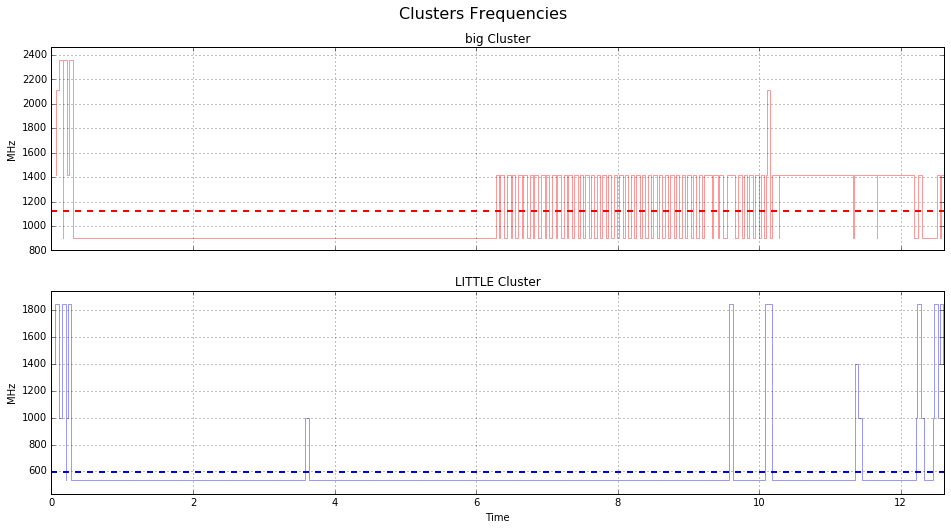

In [21]:
analysis('boost15')

## Boost 30%

06:19:53  INFO    : trace_file=../../results/nosetests_schedstune/rtapp:boost30:mixprof/1/trace.dat
06:19:53  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.sched.SchedLoadAvgTask object at 0x7f2beb2c3a10> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.SchedWakeup object at 0x7f2beb0ecd10> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.sched.SchedCpuCapacity object at 0x7f2bea147990> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.set_next_entity object at 0x7f2beb2ac3d0> from cache, reading it from trace
  warnings.warn(warnst

06:19:56  INFO    : Platform clusters verified to be Frequency coherent
06:19:57  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.14, std: 0.16
06:19:58  WARNING : Event [sched_overutilized] not found, plot DISABLED!
06:19:58  WARNING : Event [sched_overutilized] not found, plot DISABLED!
06:19:58  INFO    : LITTLE cluster average frequency: 0.601 GHz
06:19:58  INFO    : big    cluster average frequency: 1.495 GHz


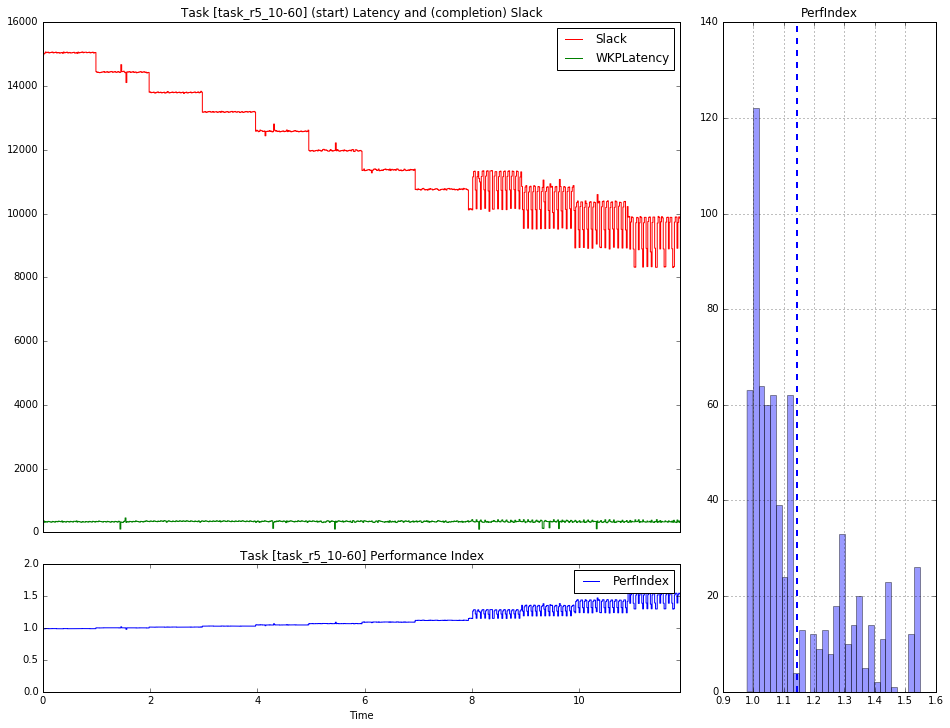

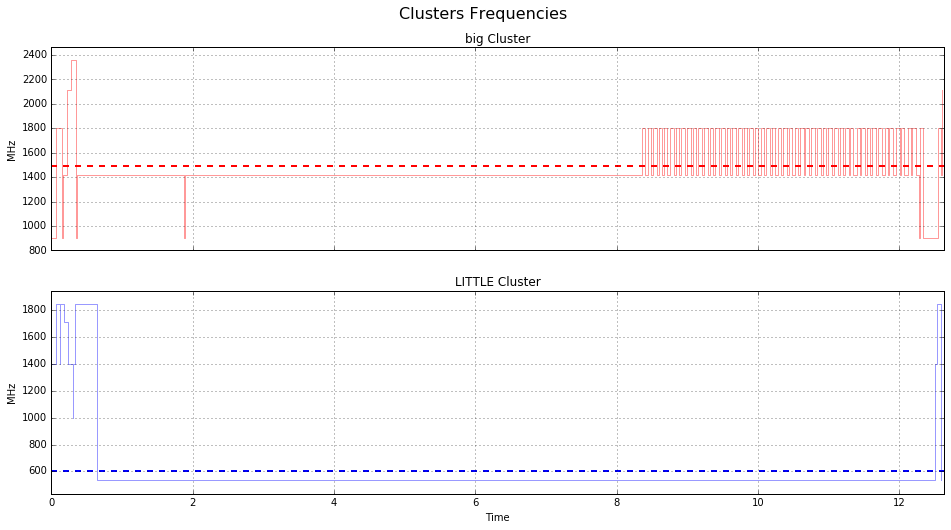

In [22]:
analysis('boost30')

# Boost 60%

06:20:38  INFO    : trace_file=../../results/nosetests_schedstune/rtapp:boost60:mixprof/1/trace.dat
06:20:38  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.sched.SchedLoadAvgTask object at 0x7f2be84e36d0> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.SchedWakeup object at 0x7f2bea9979d0> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.sched.SchedCpuCapacity object at 0x7f2bea3f7310> from cache, reading it from trace
  warnings.warn(warnstr)
/home/lisa/lisa-github/libs/trappy/trappy/ftrace.py:205: UserWarning: TRAPpy: Couldn't read <trappy.dynamic.set_next_entity object at 0x7f2bea3edb90> from cache, reading it from trace
  warnings.warn(warnst

06:20:41  INFO    : Platform clusters verified to be Frequency coherent
06:20:42  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.26, std: 0.21
06:20:43  WARNING : Event [sched_overutilized] not found, plot DISABLED!
06:20:43  WARNING : Event [sched_overutilized] not found, plot DISABLED!
06:20:43  INFO    : LITTLE cluster average frequency: 0.565 GHz
06:20:43  INFO    : big    cluster average frequency: 2.342 GHz


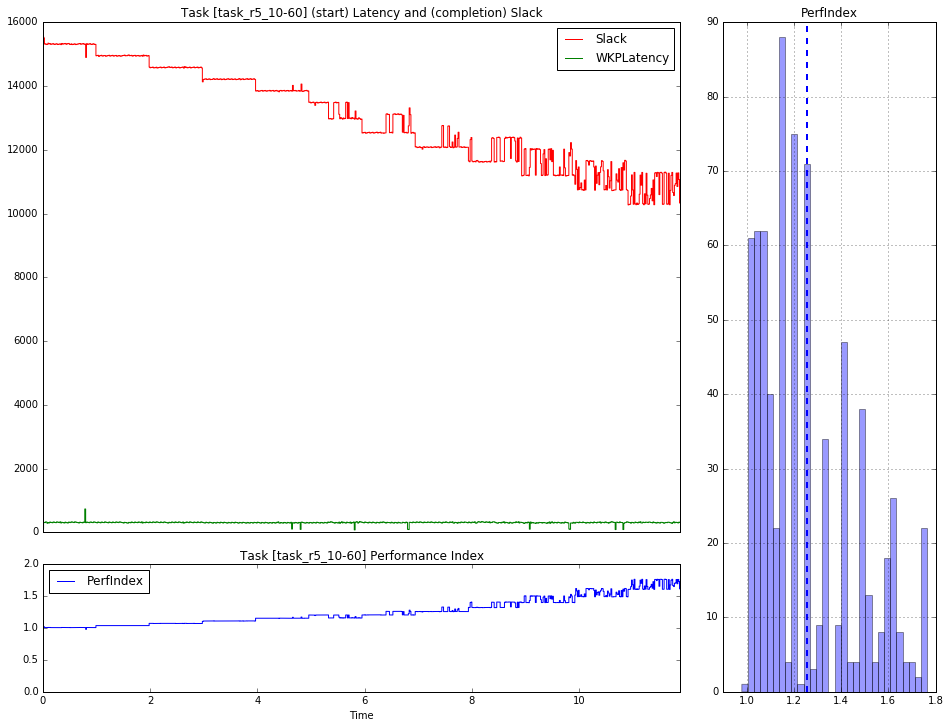

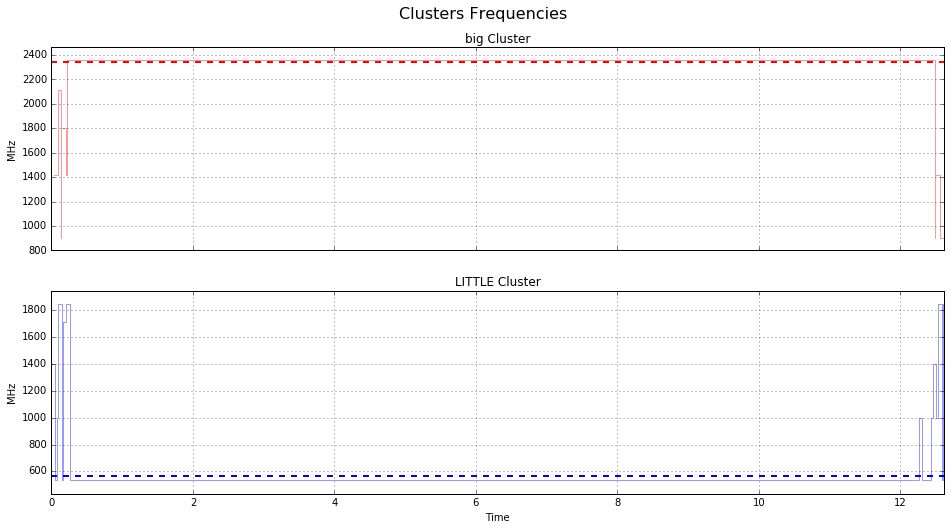

In [23]:
analysis('boost60')